In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
import os

In [5]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(42000, 785)

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv("test.csv")

In [11]:
test.shape

(28000, 784)

In [7]:
y_train = train["label"]

In [8]:
X_train = train.drop(["label"], axis = 1)

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

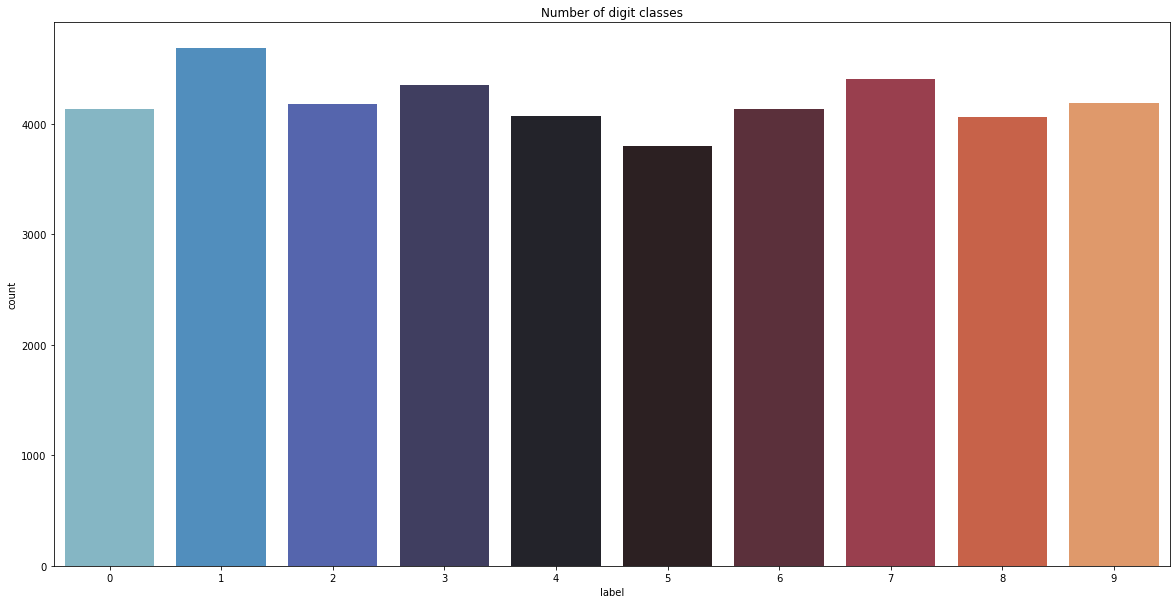

In [10]:
plt.figure(figsize = (20,10))
g = sns.countplot (y_train, palette = "icefire")
plt.title("Number of digit classes")
y_train.value_counts()

In [11]:
##Normalize the data
X_train = X_train / 255
test = test / 255
print ("x_train shape:", X_train.shape)
print ("x_test shape:", test.shape)

x_train shape: (42000, 784)
x_test shape: (28000, 784)


In [12]:
##Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print ("x_train shape:", X_train.shape)
print ("x_test shape:", test.shape)

x_train shape: (42000, 28, 28, 1)
x_test shape: (28000, 28, 28, 1)


In [13]:
##Label Encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.1)
print("x_train shape", X_train.shape)
print("x_test shape", X_val.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [15]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [17]:
## conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
## Dropout: Dropout is a technique where randomly selected neurons are ignored during training

model = Sequential()  ##Layerları barındıran yapı.
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))   ##filter = filter, kernel_size = filtre boyutu
model.add(MaxPool2D(pool_size=(2,2)))  ##kapladığı alanın max sayısını alıp belirler.
model.add(Dropout(0.25))  ##4 de 1 kapat
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))  ##strides = pooling gezdirirken matrix de atlıyacagım basamak
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [18]:
 # Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)  ##

In [19]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [21]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [24]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 13s 84ms/step - loss: 1.5790 - accuracy: 0.4527 - val_loss: 0.2142 - val_accuracy: 0.9393
Epoch 2/10
151/151 [==============================] - 12s 80ms/step - loss: 0.4571 - accuracy: 0.8553 - val_loss: 0.1384 - val_accuracy: 0.9614
Epoch 3/10
151/151 [==============================] - 12s 77ms/step - loss: 0.3252 - accuracy: 0.8955 - val_loss: 0.1063 - val_accuracy: 0.9679
Epoch 4/10
151/151 [==============================] - 12s 77ms/step - loss: 0.2643 - accuracy: 0.9187 - val_loss: 0.0905 - val_accuracy: 0.9719
Epoch 5/10
151/151 [==============================] - 12s 77ms/step - loss: 0.2293 - accuracy: 0.9285 - val_loss: 0.0777 - val_accuracy: 0.9750
Epoch 6/10
151/151 [==============================] - 12s 77ms/step - loss: 0.2142 - accuracy: 0.9334 - val_loss: 0.0746 - val_accuracy: 0.9762
Epoch 7/10
151/151 [==============================] - 12s 77ms/step - loss: 0.1948 - accuracy: 0.9406 - val_loss: 0.0675 - val_accuracy:

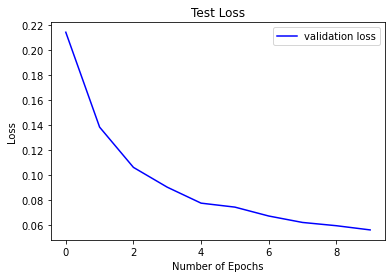

In [25]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

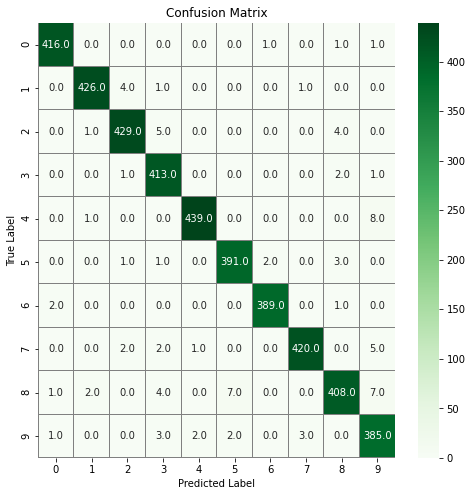

In [27]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()